Following SAN comments on slack on 22nd Feb, decide to look at isotropy on element basis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from hrs_23_figures import *
import seaborn as sns

In [2]:
all_cases = nonaf_cases + af_cases

In [3]:
r_matrix = np.zeros((len(all_cases), 5))
grad_matrix = np.zeros((len(all_cases), 5))

for j in range(0, len(all_cases)):
    case = all_cases[j]
    
    print("Case: ", case)
    
    for i in range(1, 6):
#         print("region: ", i)

        df = retrieve_fibre_strain_region(case=case, fibre_arch='endo_avg', time_frame=4, region=i)
        result = stats.pearsonr(df['f1'], df['f2'])

        a,b = np.polyfit(df['f1'], df['f2'], 1)

#         print("r: ", result[0])
#         print("grad polyfit: ", a)
        
        r_matrix[j, i-1] = result[0]
        grad_matrix[j, i-1] = a

Case:  CT-CRT/case01


FileNotFoundError: File (/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case01/dcm0/Fibres_HaoSeg/cLr-regional_labels.vtk) not found

### Pearson correlation

Text(0.5, 0, 'Region')

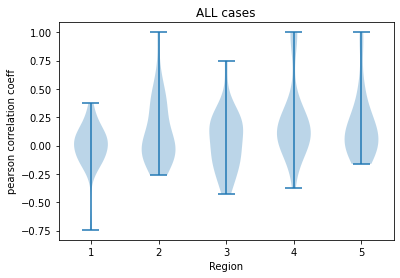

In [47]:
data_to_plot = [r_matrix[:, i] for i in range(5)] 
plt.violinplot(data_to_plot)

plt.title("ALL cases")
plt.ylabel("pearson correlation coeff")
plt.xlabel("Region")

Text(0.5, 0, 'Region')

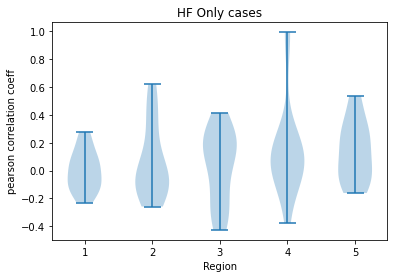

In [45]:
data_to_plot = [r_matrix[:17, i] for i in range(5)] 
plt.violinplot(data_to_plot)

plt.title("HF Only cases")
plt.ylabel("pearson correlation coeff")
plt.xlabel("Region")

Text(0.5, 0, 'Region')

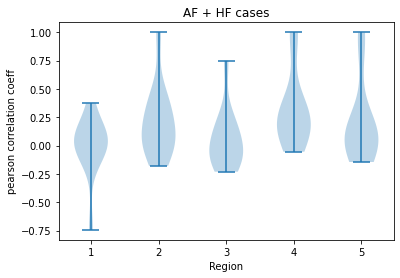

In [46]:
data_to_plot = [r_matrix[17:, i] for i in range(5)] 
plt.violinplot(data_to_plot)

plt.title("AF + HF cases")
plt.ylabel("pearson correlation coeff")
plt.xlabel("Region")

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fb073be9dc0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fb073be9d30>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fb073ba2c70>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fb073bb7310>}

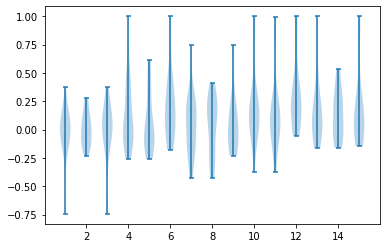

In [49]:
data_to_plot = [r_matrix[:, 0], r_matrix[:17, 0], r_matrix[17:, 0],
                r_matrix[:, 1], r_matrix[:17, 1], r_matrix[17:, 1],
                r_matrix[:, 2], r_matrix[:17, 2], r_matrix[17:, 2],
                r_matrix[:, 3], r_matrix[:17, 3], r_matrix[17:, 3],
                r_matrix[:, 4], r_matrix[:17, 4], r_matrix[17:, 4]]

plt.violinplot(data_to_plot)

(-1.0, 1.0)

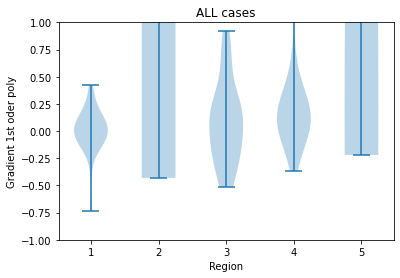

In [42]:
data_to_plot = [grad_matrix[:, i] for i in range(5)] 
plt.violinplot(data_to_plot)

plt.title("ALL cases")
plt.ylabel("Gradient 1st oder poly")
plt.xlabel("Region")
plt.ylim(-1, 1)

(-1.0, 1.0)

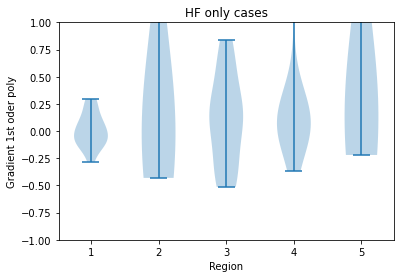

In [43]:
data_to_plot = [grad_matrix[:17, i] for i in range(5)] 
plt.violinplot(data_to_plot)

plt.title("HF only cases")
plt.ylabel("Gradient 1st oder poly")
plt.xlabel("Region")
plt.ylim(-1, 1)

(-1.0, 1.0)

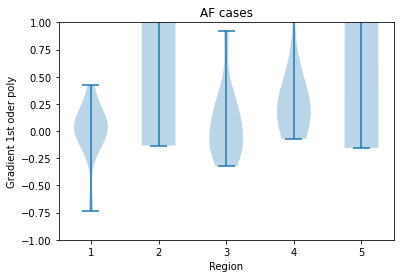

In [44]:
data_to_plot = [grad_matrix[17:, i] for i in range(5)] 
plt.violinplot(data_to_plot)

plt.title("AF cases")
plt.ylabel("Gradient 1st oder poly")
plt.xlabel("Region")
plt.ylim(-1, 1)

(-1.0, 5.0)

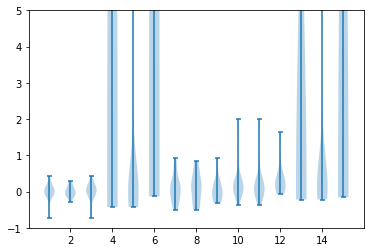

In [52]:
data_to_plot = [grad_matrix[:, 0], grad_matrix[:17, 0], grad_matrix[17:, 0],
                grad_matrix[:, 1], grad_matrix[:17, 1], grad_matrix[17:, 1],
                grad_matrix[:, 2], grad_matrix[:17, 2], grad_matrix[17:, 2],
                grad_matrix[:, 3], grad_matrix[:17, 3], grad_matrix[17:, 3],
                grad_matrix[:, 4], grad_matrix[:17, 4], grad_matrix[17:, 4]]

plt.violinplot(data_to_plot)

plt.ylim(-1,5)

These results suggest that,

in HF only, there is little correlation between fiber and cross fiber strains on an element basis. This is the case across most regions. This is shown by:

* Grad in 1st order polyfit being ~ 0
* r ~ 0